### **Introduction and Problem Statement**
- The goal is to estimate the medical insurance claim amount of a patient based on their medical history and other relevant factors.
- The problem can be solved using a regression model, which predicts a continuous output variable based on one or more input features.

### **Data Understanding and Description**
- The dataset named Medical Cost Personal taken from kaggle is used for this task.
- It has 1338 rows and 7 features having charges as the target column.
- The features are age, sex, bmi, children, smoker, region, and charges.
- The dataset has no nan or missing values.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [76]:
data=pd.read_csv('insurance.csv')
print(data.head())
print(data.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
print("Missing Values: ",data.isnull().sum()) # Identifying Missing Values

Missing Values:  age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: xlabel='bmi', ylabel='charges'>

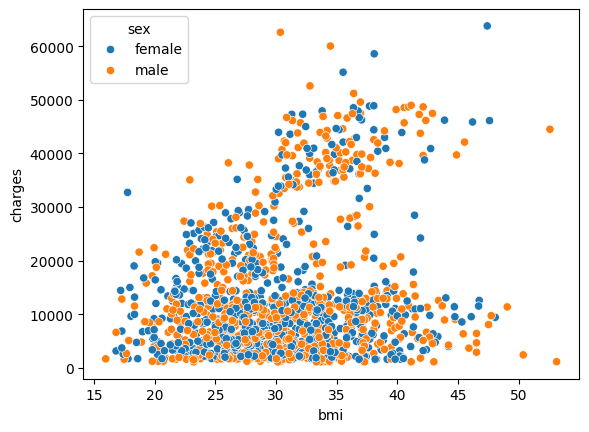

In [ ]:
sns.scatterplot(x="bmi",y="charges",data=data,hue="sex") # scatterplot showing the relationship between bmi and charges.

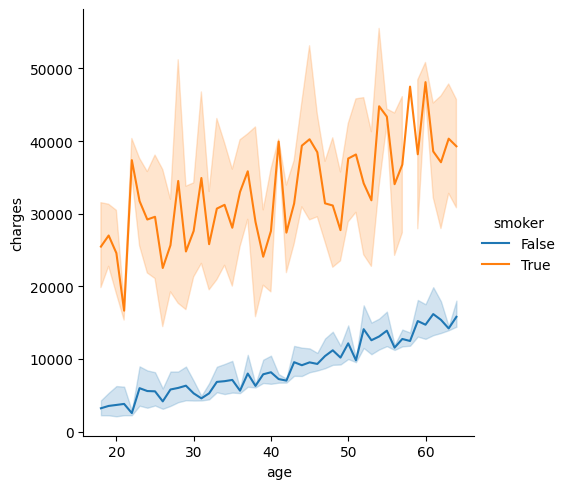

In [89]:
sns.relplot(x="age",y="charges",data=data,hue="smoker",kind="line") # relplot with the line kind to find out the relationship between age and charges along with smokers and non-smokers.


<Axes: xlabel='smoker', ylabel='charges'>

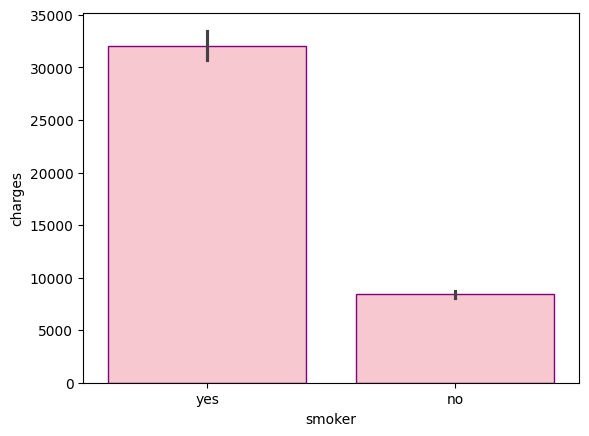

In [ ]:
sns.barplot(x='smoker',y='charges',data=data,color='pink',edgecolor="purple") # bar plot to show relation btw smoker and charges.

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [ ]:
# One hot Encoding
region_dummies = pd.get_dummies(data['region'], prefix='region', drop_first=True)
# Concatenate them with the original Data
data = pd.concat([data.drop('region', axis=1), region_dummies], axis=1)


In [ ]:
data['sex']=pd.get_dummies(data['sex'],drop_first=True)  # One-hot encoding along with dropping the present column.
data['smoker']=pd.get_dummies(data['smoker'],drop_first=True)
data

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,False,27.900,0,True,16884.92400,False,False,True
1,18,True,33.770,1,False,1725.55230,False,True,False
2,28,True,33.000,3,False,4449.46200,False,True,False
3,33,True,22.705,0,False,21984.47061,True,False,False
4,32,True,28.880,0,False,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,True,30.970,3,False,10600.54830,True,False,False
1334,18,False,31.920,0,False,2205.98080,False,False,False
1335,18,False,36.850,0,False,1629.83350,False,True,False
1336,21,False,25.800,0,False,2007.94500,False,False,True


In [84]:
X=data.drop("charges",axis=1) # Target Column
Y=data["charges"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((1070, 8), (268, 8))

In [86]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
model = LinearRegression() # Linear Regression model as the predicted column is continuous.
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
# Evaluating model using MAE and RMSE
mae=mean_absolute_error(y_test,y_pred)
print("Mean_Absolute_Error:", mae)
mse=mean_squared_error(y_test,y_pred)
print("Root_Mean_Squared_Error : ",np.sqrt(mse))

Mean_Absolute_Error: 4181.19447375365
Root_Mean_Squared_Error :  5796.2846592762735


### **Key Insights**
- The model used is Linear Regression which is find a best fit line for the data points. It is a simple and widely used model for regression problems.
- The model's performance is evaluated using the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) metrics.
- Mean Absolute Error is 4181.19 and Root Mean Squared Error is 5796.28. As these values are large so log transformation can be applied to the data to reduce the effect of outliers and improve the model's performance.